<a href="https://colab.research.google.com/github/leesa9596/practice/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/minsuk-heo/tf2/blob/master/jupyter_notebooks/04.AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from __future__ import absolute_import, division, print_function, unicode_literals

In [65]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

import numpy as np

'from IPython.display import Image\n\n# in order to always get the same result\ntf.random.set_seed(1)\nnp.random.seed(1)'

In [66]:
#get mnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [82]:
# we will use train data for auto encoder training
x_train = x_train.reshape(60000, 784)

'''# select only 300 test data for visualization 
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)'''

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
x_train /= 255
x_test /= 255

In [83]:
# MNIST input 28 rows * 28 columns = 784 pixels
input_img = Input(shape=(784,))
# encoder
encoder1 = Dense(128, activation='sigmoid')(input_img)
encoder2 = Dense(2, activation='sigmoid')(encoder1)
# decoder
decoder1 = Dense(128, activation='sigmoid')(encoder2)
decoder2 = Dense(784, activation='sigmoid')(decoder1)

# maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoder2)

In [84]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [85]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))
#no label/put the same img (x_train)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0099 - val_loss: 1.7153e-04
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 9.4383e-05 - val_loss: 5.2805e-05
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 4.1900e-05 - val_loss: 3.2223e-05
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 3.0941e-05 - val_loss: 2.6950e-05
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.8053e-05 - val_loss: 2.5453e-05


In [86]:
# create encoder model
encoder = Model(inputs=input_img, outputs=encoder2)
# get latent vector(for visualization)
latent_vector = encoder.predict(x_test) 


In [87]:
# create decoder model
encoded_input = Input(shape=(2,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))

# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

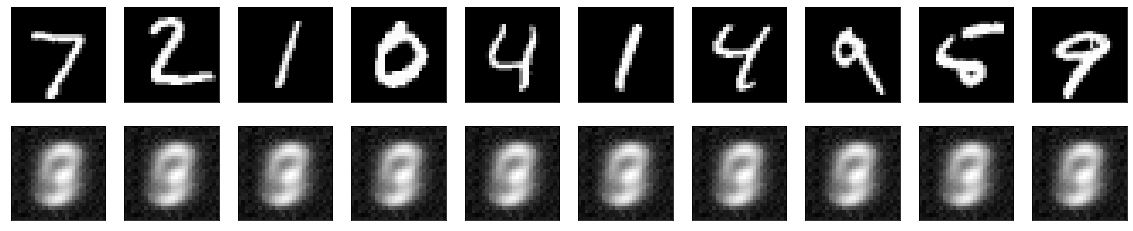

In [88]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()